In [54]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Function to extract Product Name
def get_ProductName(soup):
    try:
        # Outer Tag Object
        Product_Name = soup.find(class_="-fs20 -pts -pbxs")
        
        # Inner NavigatableString Object
        ProductName_value = Product_Name.text

        # Title as a string value
        ProductName_string = ProductName_value.strip()

    except AttributeError:
        ProductName_string = ""

    return ProductName_string

# Function to extract Product Price
def get_price(soup):
    try:
        price = soup.find(class_="-b -ubpt -tal -fs24 -prxs").string.strip()

    except AttributeError:
        price = ""

    return price

# Function to extract old price
def get_Oldprice(soup):
    try:
        price = soup.find(class_="-tal -gy5 -lthr -fs16 -pvxs -ubpt").string.strip()

    except AttributeError:
        price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):
    try:
       rating_div = soup.find("div", class_="stars _m _al")
       rating = rating_div.text.strip()

    except AttributeError:
        rating = ""    

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    review_count = ""
    try:
        verified_ratings_link = soup.find("a", class_="-plxs _more")
        if verified_ratings_link:
            review_count = verified_ratings_link.text.strip()

    except AttributeError:
        pass

    return review_count


if __name__ == '__main__':
    HEADERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'}
    
    URL="https://www.jumia.co.ke/category-url-en-wide-screen-tv/?rating=1-5&page=4#catalog-listing"
    
    webpage = requests.get(URL, headers=HEADERS)
    
    soup = BeautifulSoup(webpage.content, "html.parser")
    
    links = soup.find_all("a", attrs={'class': 'core'})
    
    links_list = []
    
    for link in links:
        links_list.append(link.get('href'))
    
    d = {"Product Name":[], "Product Price":[], "Price Before Discount":[], "rating":[], "review count":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://jumia.co.ke" + link, headers=HEADERS, allow_redirects=True)
    
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")
         
        # Function calls to display all necessary product information
        d['Product Name'].append(get_ProductName(new_soup))
        d['Product Price'].append(get_price(new_soup))
        d['Price Before Discount'].append(get_Oldprice(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['review count'].append(get_review_count(new_soup))

In [ ]:
jumia_df = pd.DataFrame.from_dict(d)
jumia_df['Product Name'].replace('', np.nan, inplace=True)
jumia_df = jumia_df.dropna(subset=['Product Name'])
jumia_df.to_csv("jumia_data40.csv", header=True, index=False)

In [4]:
jumia_df

,Product Name,Product Price,Price Before Discount,rating,review count
0,Samsung 55CU8000 CRYSTAL UHD 4K SMART TV,"KSh 83,999","KSh 100,000",5 out of 5,(1 verified rating)
1,"Vitron 4K UHD Android 50"" Inch-TV,BLUETOOTH-EN...","KSh 38,990","KSh 60,000",4.3 out of 5,(7 verified ratings)


In [2]:
import pandas as pd
import os

# Define the directory containing the CSV files
csv_directory = r'C:\Users\user\Desktop\Project Data'  # Use raw string to handle backslashes

# Create an empty list to hold dataframes
dataframes = []

# Loop through each file in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_directory, filename)
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)



In [3]:
combined_df

,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),"KSh 37,199","KSh 43,000",5 out of 5,(1 verified rating)
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...","KSh 34,490","KSh 42,999",4.4 out of 5,(8 verified ratings)
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...","KSh 14,999","KSh 21,300",4.2 out of 5,(18 verified ratings)
3,"Gld 43"" Smart Frameless Full HD LED Television...","KSh 19,497","KSh 30,000",4 out of 5,(1 verified rating)
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,"KSh 21,990","KSh 37,200",4.3 out of 5,(4 verified ratings)
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,"KSh 13,999","KSh 21,000",1 out of 5,(1 verified rating)
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...","KSh 14,999","KSh 19,999",0 out of 5,(No ratings available)
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...","KSh 13,284","KSh 15,899",4 out of 5,(3 verified ratings)
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,"KSh 4,270","KSh 6,500",0 out of 5,(No ratings available)


In [3]:
#Loading the dataset
pd.read_csv(r'C:\Users\user\FullProjectData.csv')

,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),"KSh 37,199","KSh 43,000",5 out of 5,(1 verified rating)
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...","KSh 34,490","KSh 42,999",4.4 out of 5,(8 verified ratings)
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...","KSh 14,999","KSh 21,300",4.2 out of 5,(18 verified ratings)
3,"Gld 43"" Smart Frameless Full HD LED Television...","KSh 19,497","KSh 30,000",4 out of 5,(1 verified rating)
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,"KSh 21,990","KSh 37,200",4.3 out of 5,(4 verified ratings)
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,"KSh 13,999","KSh 21,000",1 out of 5,(1 verified rating)
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...","KSh 14,999","KSh 19,999",0 out of 5,(No ratings available)
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...","KSh 13,284","KSh 15,899",4 out of 5,(3 verified ratings)
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,"KSh 4,270","KSh 6,500",0 out of 5,(No ratings available)


In [55]:
df=pd.read_csv(r'C:\Users\user\FullProjectData.csv')
df

,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),"KSh 37,199","KSh 43,000",5 out of 5,(1 verified rating)
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...","KSh 34,490","KSh 42,999",4.4 out of 5,(8 verified ratings)
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...","KSh 14,999","KSh 21,300",4.2 out of 5,(18 verified ratings)
3,"Gld 43"" Smart Frameless Full HD LED Television...","KSh 19,497","KSh 30,000",4 out of 5,(1 verified rating)
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,"KSh 21,990","KSh 37,200",4.3 out of 5,(4 verified ratings)
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,"KSh 13,999","KSh 21,000",1 out of 5,(1 verified rating)
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...","KSh 14,999","KSh 19,999",0 out of 5,(No ratings available)
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...","KSh 13,284","KSh 15,899",4 out of 5,(3 verified ratings)
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,"KSh 4,270","KSh 6,500",0 out of 5,(No ratings available)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           1531 non-null   object
 1   Product Price          1531 non-null   object
 2   Price Before Discount  1451 non-null   object
 3   rating                 1531 non-null   object
 4   review count           1531 non-null   object
dtypes: object(5)
memory usage: 59.9+ KB


In [5]:
df.describe()

,Product Name,Product Price,Price Before Discount,rating,review count
count,1531,1531,1451,1531,1531
unique,1240,670,325,28,74
top,Sony 50X75K 50'' Smart UHD 4K Android HDR (Goo...,"KSh 22,999","KSh 40,000",0 out of 5,(No ratings available)
freq,5,26,144,764,764


In [6]:
df.dtypes

Product Name             object
Product Price            object
Price Before Discount    object
rating                   object
review count             object
dtype: object

In [56]:
#Replace (no ratings available) with 0 ratings available
df['review count'] = df['review count'].str.replace(r'(No ratings available)', '0 ratings available', regex=True)
df

,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),"KSh 37,199","KSh 43,000",5 out of 5,(1 verified rating)
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...","KSh 34,490","KSh 42,999",4.4 out of 5,(8 verified ratings)
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...","KSh 14,999","KSh 21,300",4.2 out of 5,(18 verified ratings)
3,"Gld 43"" Smart Frameless Full HD LED Television...","KSh 19,497","KSh 30,000",4 out of 5,(1 verified rating)
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,"KSh 21,990","KSh 37,200",4.3 out of 5,(4 verified ratings)
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,"KSh 13,999","KSh 21,000",1 out of 5,(1 verified rating)
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...","KSh 14,999","KSh 19,999",0 out of 5,(0 ratings available)
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...","KSh 13,284","KSh 15,899",4 out of 5,(3 verified ratings)
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,"KSh 4,270","KSh 6,500",0 out of 5,(0 ratings available)


In [57]:
#Extracting numeric digits in the product price,price before discount,ratings and review count columns
df['Product Price'] = df['Product Price'].str.extract(r'(\d{1,3}(?:,\d{3})*)', expand=False).str.replace(',', '')
df['Price Before Discount']=df['Price Before Discount'].str.extract(r'(\d{1,3}(?:,\d{3})*)', expand=False).str.replace(',', '')
df['review count']=df['review count'].str.extract(r'(\d+)')
df['rating'] = df['rating'].apply(lambda x: (x.split()[0]))
df


,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),37199,43000,5,1
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...",34490,42999,4.4,8
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...",14999,21300,4.2,18
3,"Gld 43"" Smart Frameless Full HD LED Television...",19497,30000,4,1
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,21990,37200,4.3,4
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,13999,21000,1,1
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...",14999,19999,0,0
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...",13284,15899,4,3
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,4270,6500,0,0


In [9]:
df.dtypes

Product Name             object
Product Price            object
Price Before Discount    object
rating                   object
review count             object
dtype: object

In [58]:
#Converting respective columns to appropriate data types in order to perform calculations.
df['Product Price'] = pd.to_numeric(df['Product Price'])
df['Price Before Discount'] = pd.to_numeric(df['Price Before Discount'])
df['rating'] = pd.to_numeric(df['rating'])
df['review count'] = pd.to_numeric(df['review count'])
df.dtypes



Product Name              object
Product Price              int64
Price Before Discount    float64
rating                   float64
review count               int64
dtype: object

In [11]:
df.nunique()

Product Name             1240
Product Price             667
Price Before Discount     325
rating                     28
review count               74
dtype: int64

In [12]:
df.isnull().sum()

Product Name              0
Product Price             0
Price Before Discount    80
rating                    0
review count              0
dtype: int64

In [59]:
#Drop rows where the price before  discount is null
df.dropna(subset=['Price Before Discount'], inplace=True)
df

,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),37199,43000.0,5.0,1
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...",34490,42999.0,4.4,8
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...",14999,21300.0,4.2,18
3,"Gld 43"" Smart Frameless Full HD LED Television...",19497,30000.0,4.0,1
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,21990,37200.0,4.3,4
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,13999,21000.0,1.0,1
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...",14999,19999.0,0.0,0
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...",13284,15899.0,4.0,3
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,4270,6500.0,0.0,0


In [60]:
#Where the rating is 0 replace with null and then forward fill to handle the null value
df['rating'].replace(0.0, np.nan, inplace=True)
df['rating'].fillna(method='ffill', inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_11780\1379265601.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rating'].fillna(method='ffill', inplace=True)


,Product Name,Product Price,Price Before Discount,rating,review count
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),37199,43000.0,5.0,1
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...",34490,42999.0,4.4,8
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...",14999,21300.0,4.2,18
3,"Gld 43"" Smart Frameless Full HD LED Television...",19497,30000.0,4.0,1
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,21990,37200.0,4.3,4
...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,13999,21000.0,1.0,1
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...",14999,19999.0,1.0,0
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...",13284,15899.0,4.0,3
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,4270,6500.0,4.0,0


In [61]:
#Adding a new column of percentage discount
df['Discount']=(df['Price Before Discount']-df['Product Price'])
df['Percentage Discount']=(df['Discount']/df['Price Before Discount'])*100
df

,Product Name,Product Price,Price Before Discount,rating,review count,Discount,Percentage Discount
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),37199,43000.0,5.0,1,5801.0,13.490698
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...",34490,42999.0,4.4,8,8509.0,19.788832
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...",14999,21300.0,4.2,18,6301.0,29.582160
3,"Gld 43"" Smart Frameless Full HD LED Television...",19497,30000.0,4.0,1,10503.0,35.010000
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,21990,37200.0,4.3,4,15210.0,40.887097
...,...,...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,13999,21000.0,1.0,1,7001.0,33.338095
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...",14999,19999.0,1.0,0,5000.0,25.001250
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...",13284,15899.0,4.0,3,2615.0,16.447575
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,4270,6500.0,4.0,0,2230.0,34.307692


In [16]:
df.dtypes

Product Name              object
Product Price              int64
Price Before Discount    float64
rating                   float64
review count               int64
Discount                 float64
Percentage Discount      float64
dtype: object

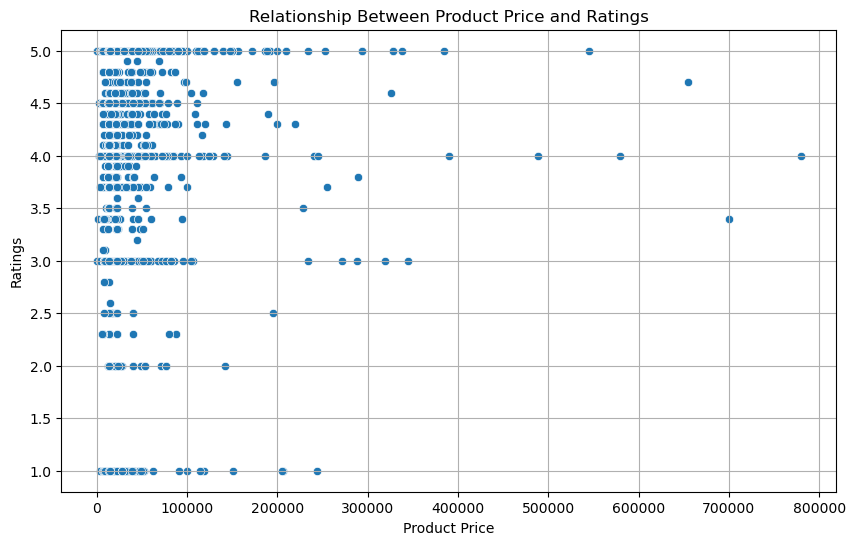

In [62]:
#Plotting the relationship between product price and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product Price', y='rating', data=df)
plt.title('Relationship Between Product Price and Ratings')
plt.xlabel('Product Price')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


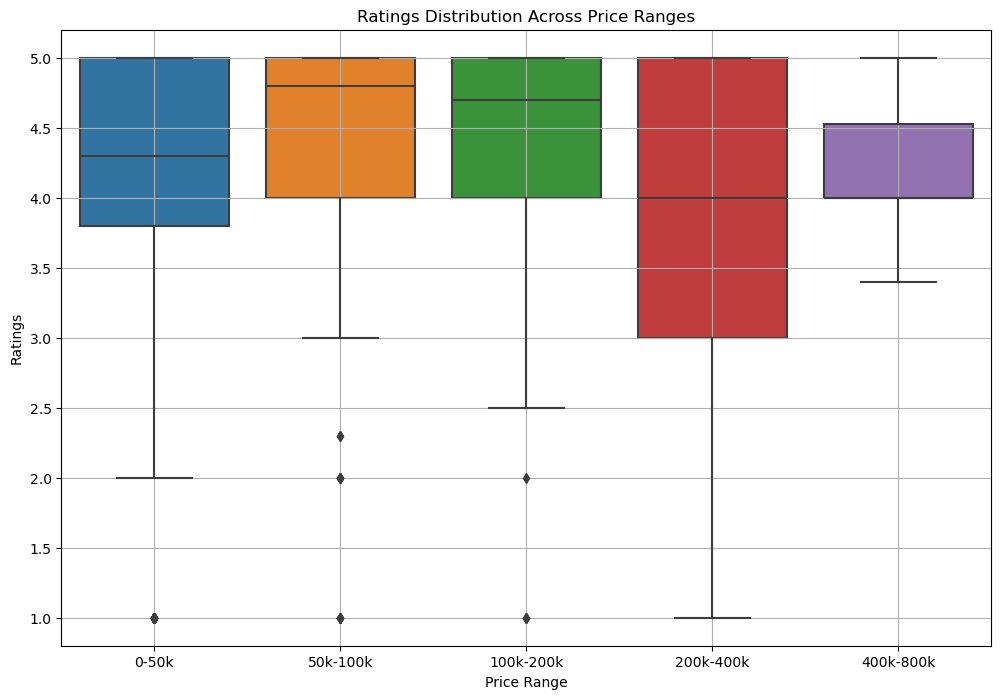

In [63]:
#Segmenting the price range and visualizing with a box plot to compare the ratings in different price ranges.

price_bins = [0, 50000, 100000, 200000, 400000, 800000]
df['price_range'] = pd.cut(df['Product Price'], bins=price_bins, labels=['0-50k', '50k-100k', '100k-200k', '200k-400k', '400k-800k'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='price_range', y='rating', data=df)
plt.title('Ratings Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


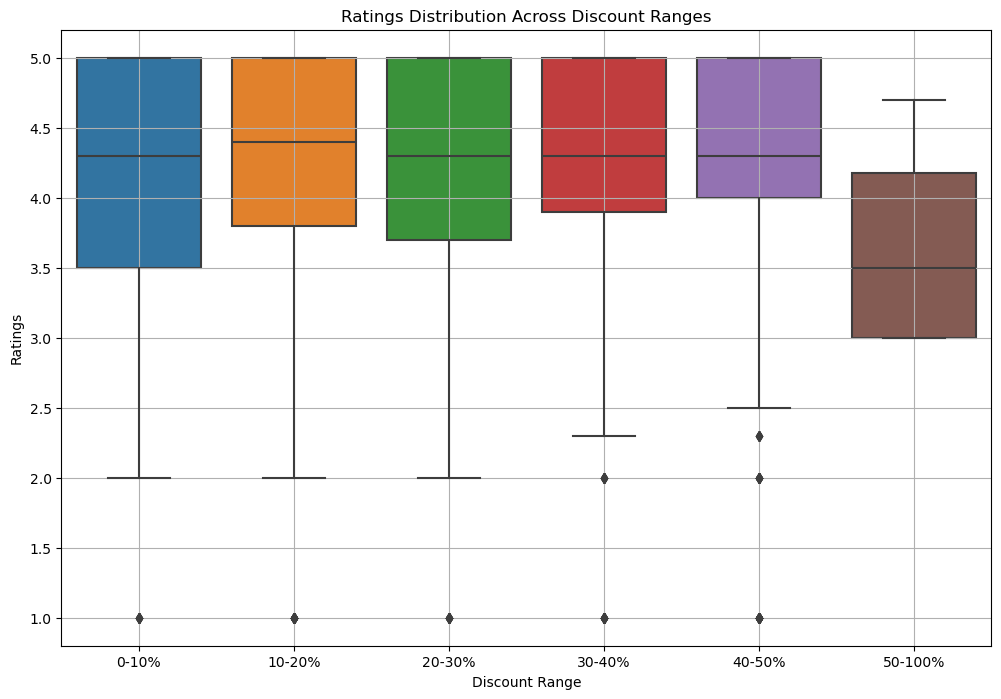

In [64]:
#Identifying How percentage discount affect the price ratings
# Create discount bins for better visualization
df['discount_range'] = pd.cut(df['Percentage Discount'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='discount_range', y='rating', data=df)
plt.title('Ratings Distribution Across Discount Ranges')
plt.xlabel('Discount Range')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()


In [65]:
#Introducing a new feature (Sales Volume) our target variable since it is not available in the data using a base value and the available product features
# Create synthetic sales volume
np.random.seed(42)  # For reproducibility
base_sales = 1500
df['Sales Volume'] = (base_sales * 
                        (df['rating'] / 5) * 
                         (1 + df['Percentage Discount'] / 100)).astype(int)
df

,Product Name,Product Price,Price Before Discount,rating,review count,Discount,Percentage Discount,price_range,discount_range,Sales Volume
0,Hisense 43A6K 43 inch 4K UHD Smart TV (2YRs WRTY),37199,43000.0,5.0,1,5801.0,13.490698,0-50k,10-20%,1702
1,"TCL 43S5400A,43"" Inch Smart ANDROID TV BT Ica...",34490,42999.0,4.4,8,8509.0,19.788832,0-50k,10-20%,1581
2,"Vitron 32"" Inch Smart Android Tv,Frameless, Ne...",14999,21300.0,4.2,18,6301.0,29.582160,0-50k,20-30%,1632
3,"Gld 43"" Smart Frameless Full HD LED Television...",19497,30000.0,4.0,1,10503.0,35.010000,0-50k,30-40%,1620
4,Hifinit 43'' Inch Android Smart FHD NETFLIX YO...,21990,37200.0,4.3,4,15210.0,40.887097,0-50k,40-50%,1817
...,...,...,...,...,...,...,...,...,...,...
1526,CTC Smart Android Television-32'' With Inbuilt...,13999,21000.0,1.0,1,7001.0,33.338095,0-50k,30-40%,400
1527,"Vitron 32 Inch Frameless Smart Android TV,Inbu...",14999,19999.0,1.0,0,5000.0,25.001250,0-50k,20-30%,375
1528,"Gld 32"" CLEAR Frameless Smart Android TV NETF...",13284,15899.0,4.0,3,2615.0,16.447575,0-50k,10-20%,1397
1529,PowMr 20A MPPT Solar Charger Controller 60Voc ...,4270,6500.0,4.0,0,2230.0,34.307692,0-50k,30-40%,1611


In [66]:
df['Sales Volume'].dtype

dtype('int32')

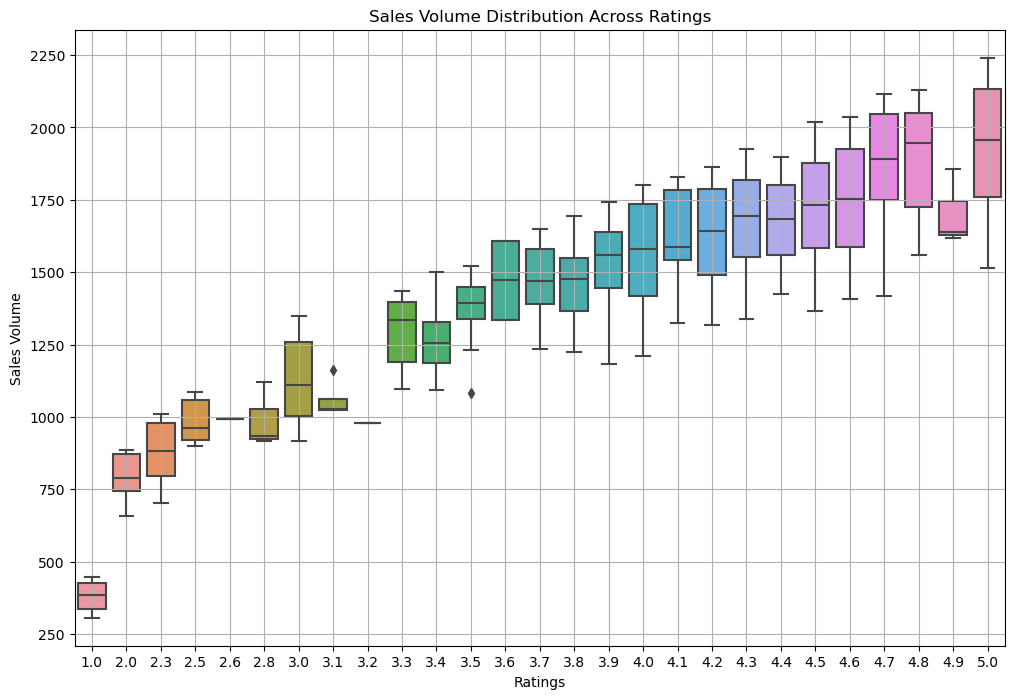

In [67]:
#VIsualizing the relationship between sales volume and ratings using a boxplot.
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='Sales Volume', data=df)
plt.title('Sales Volume Distribution Across Ratings')
plt.xlabel('Ratings')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


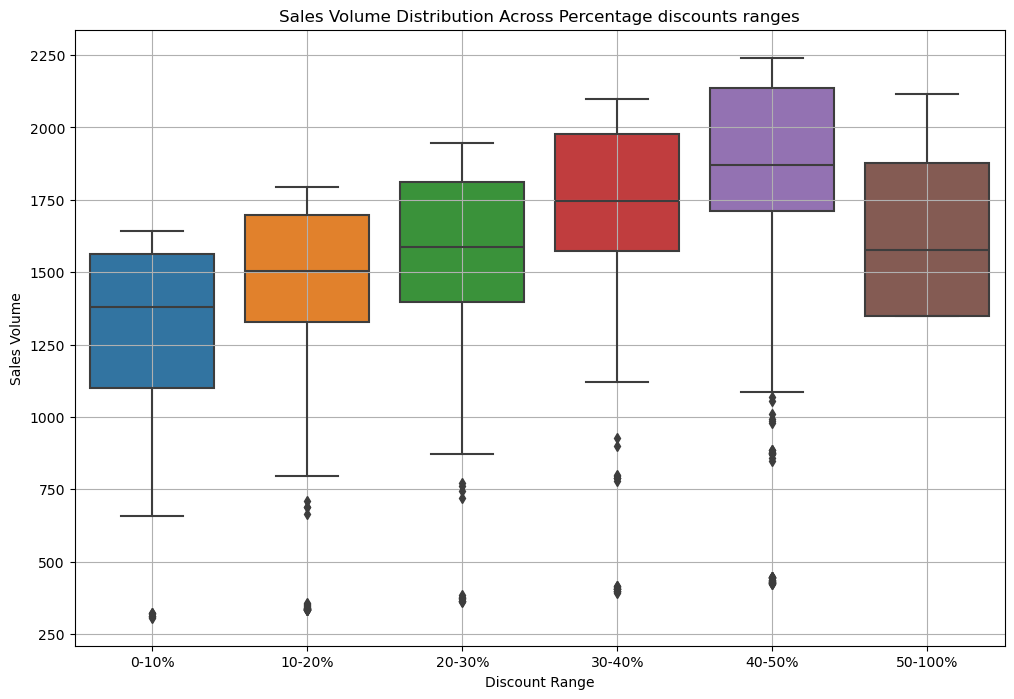

In [68]:
#Visualizing the relationship between sales volume and percentage discount
plt.figure(figsize=(12, 8))
sns.boxplot(x='discount_range', y='Sales Volume', data=df)
plt.title('Sales Volume Distribution Across Percentage discounts ranges')
plt.xlabel('Discount Range')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()


In [30]:
df.columns

Index(['Product Name', 'Product Price', 'Price Before Discount', 'rating',
       'review count', 'Discount', 'Percentage Discount', 'price_range',
       'discount_range', 'Sales Volume'],
      dtype='object')

In [69]:
#Specifying the features and the target variable
features = ['Product Price', 'Price Before Discount', 'rating', 'review count', 'Discount','Percentage Discount']
target = 'Sales Volume'

In [70]:
# Defining the feature matrix (X) and the target vector (y)
X = df[features]
y = df['Sales Volume']

In [71]:
#Spliting the data into training and testing sets using train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [72]:
print(X_train,y_train)

      Product Price  Price Before Discount  rating  review count  Discount  \
0             37199                43000.0     5.0             1    5801.0   
1             34490                42999.0     4.4             8    8509.0   
2             14999                21300.0     4.2            18    6301.0   
3             19497                30000.0     4.0             1   10503.0   
4             21990                37200.0     4.3             4   15210.0   
...             ...                    ...     ...           ...       ...   
1226          51999                55490.0     5.0             1    3491.0   
1228          77999               120000.0     5.0             2   42001.0   
1229          45990                90000.0     4.7            20   44010.0   
1230          41999                50000.0     3.8             5    8001.0   
1231          54499                60000.0     5.0             2    5501.0   

      Percentage Discount  
0               13.490698  
1      

In [73]:
print(X_test,y_test)

      Product Price  Price Before Discount  rating  review count  Discount  \
1232          59499                87000.0     5.0             5   27501.0   
1233          44899                89000.0     4.5             2   44101.0   
1234          46300                85000.0     4.0             1   38700.0   
1235          37999                60000.0     5.0             1   22001.0   
1236          89995                94995.0     5.0             1    5000.0   
...             ...                    ...     ...           ...       ...   
1526          13999                21000.0     1.0             1    7001.0   
1527          14999                19999.0     1.0             0    5000.0   
1528          13284                15899.0     4.0             3    2615.0   
1529           4270                 6500.0     4.0             0    2230.0   
1530          14399                21000.0     5.0             1    6601.0   

      Percentage Discount  
1232            31.610345  
1233   

In [74]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
#Let's check the score of the model
train_score=model.score(X_train,y_train)
train_score

0.9896518056070158

In [76]:
#Let's make predictions on the test data.
y_pred = model.predict(X_test)
y_pred

array([1963.61894021, 1991.79730208, 1751.11396232, 2026.16095441,
       1640.71131229, 1639.07593832, 1394.55276187, 1752.28928066,
       1777.84493279, 1787.52730234, 1960.38460711, 2004.15428257,
       1667.65510633, 1719.07243217, 1308.00225841, 1887.69564008,
       1827.71239631, 2004.42549488,  990.71621896, 1640.71131229,
       1314.41219618, 1473.76383835, 2090.66059369, 1679.93853049,
       1777.84493279, 1921.04048731, 1402.36513878, 1596.98162092,
       1900.309059  , 2012.08968902, 2103.26300235, 2004.15428257,
       1887.69564008, 1512.15315497, 1787.52730234, 1652.4607975 ,
       1751.11396232, 2065.26483865, 1667.65510633, 1780.30414302,
       2026.16095441, 2026.16095441, 1880.64220714, 1580.61329913,
       1772.04914772, 1488.63634406, 1899.20243283, 1394.55276187,
       1565.20354914,  442.46051174,  344.88690362, 1737.80817849,
       1519.19838182, 1685.98226271, 1498.77482068, 1414.76941837,
       1819.31896738, 1393.62906044, 2159.02991155, 2178.58526

In [77]:
y_test

1232    1974
1233    2018
1234    1746
1235    2050
1236    1578
        ... 
1526     400
1527     375
1528    1397
1529    1611
1530    1971
Name: Sales Volume, Length: 291, dtype: int32

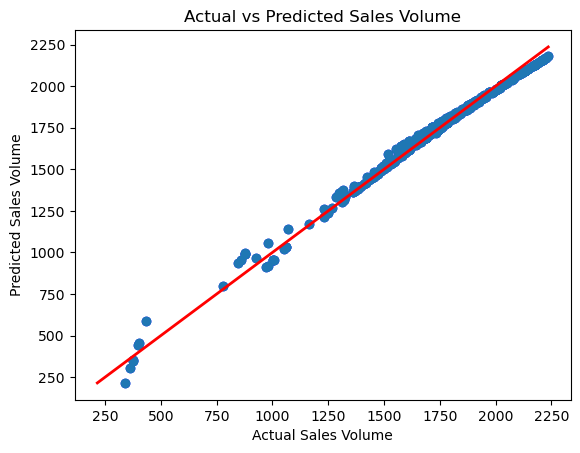

In [78]:
#Visualizing the actual sales vs predicted sales with a scatter plot and a regression line

plt.scatter(y_test, y_pred, color='blue', label='Predicted data')
# Add the regression line (perfect prediction line y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Perfect prediction line')
# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('Actual vs Predicted Sales Volume')
plt.show()

In [79]:
#We are going yo use Mean Square Error (MSE),Mean Absolute Error (MAE),R-squared and Root Mean Squared Error (RMSE) Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 23.090072671707595
Mean Squared Error: 1090.5352456143012
Root Mean Squared Error: 33.023253104657954
R-squared: 0.9920899524829483


In [80]:
#We use the pickle library
with open('SalesPredictionModel.pkl', 'wb') as file:
    pickle.dump(model, file)


In [81]:
#Let's load the model and see if it was saved
with open('SalesPredictionModel.pkl', 'rb') as file:
    Model = pickle.load(file)
    

In [82]:
y_pred = Model.predict(X_test)

print(r2_score(y_test, y_pred))

0.9920899524829483
